In [1]:
pip install tweet-preprocessor

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
import nltk
import numpy as np
import pandas as pd
import preprocessor as p
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
train_df = pd.read_csv('Reddit.csv')

In [6]:
def preprocess_tweet(row):
    text = row['body']
    text = text.lower()
    text = p.clean(text)
    return text

In [7]:
train_df['body'] = train_df.apply(preprocess_tweet, axis=1)
train_df['body'] = train_df['body'].str.replace('[^a-zA-Z0-9 \n\.]', '', regex=True)

In [8]:
train_df.head()

,author,submission,body,score,id,parent_id,created
0,spaniel_rage,10bwiuy,the cdc seems to think its unlikely this safet...,11,j4cmwjf,t3_10bwiuy,2023-01-15 03:42:02
1,pharmaboy2,10bwiuy,im a little troubled that the cdc reported the...,6,j4f92fq,t1_j4cmwjf,2023-01-15 15:51:30
2,mrspc1000,10bwiuy,i would not trust a large pharmaceutical compa...,11,j4eih22,t1_j4cmwjf,2023-01-15 11:33:05
3,sacre_bae,10bwiuy,good,4,j4crho1,t1_j4cmwjf,2023-01-15 04:12:58
4,Mymerrybean,10bwiuy,pfizer document a cummulative analysis of pos...,0,j4g071f,t1_j4cmwjf,2023-01-15 21:31:43


In [9]:
nltk.download('stopwords')
stop = stopwords.words('english')
train_df['body'] = train_df['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NPStudent\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
nltk.downloader.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
train_df['vader_scores'] = train_df['body'].apply(lambda evaluation: sid.polarity_scores(evaluation))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\NPStudent\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
train_df

,author,submission,body,score,id,parent_id,created,vader_scores
0,spaniel_rage,10bwiuy,cdc seems think unlikely safety signal going t...,11,j4cmwjf,t3_10bwiuy,2023-01-15 03:42:02,"{'neg': 0.031, 'neu': 0.84, 'pos': 0.129, 'com..."
1,pharmaboy2,10bwiuy,im little troubled cdc reported safety signal ...,6,j4f92fq,t1_j4cmwjf,2023-01-15 15:51:30,"{'neg': 0.127, 'neu': 0.754, 'pos': 0.118, 'co..."
2,mrspc1000,10bwiuy,would trust large pharmaceutical company provi...,11,j4eih22,t1_j4cmwjf,2023-01-15 11:33:05,"{'neg': 0.188, 'neu': 0.379, 'pos': 0.433, 'co..."
3,sacre_bae,10bwiuy,good,4,j4crho1,t1_j4cmwjf,2023-01-15 04:12:58,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
4,Mymerrybean,10bwiuy,pfizer document cummulative analysis post auth...,0,j4g071f,t1_j4cmwjf,2023-01-15 21:31:43,"{'neg': 0.235, 'neu': 0.686, 'pos': 0.078, 'co..."
5,CoronavirusDownunder-ModTeam,10bwiuy,thank contributing rcoronavirusdownunder.unfor...,1,j4i3i9d,t1_j4g1gsv,2023-01-16 05:52:26,"{'neg': 0.247, 'neu': 0.557, 'pos': 0.197, 'co..."
6,CoronavirusDownunder-ModTeam,10bwiuy,thank contributing rcoronavirusdownunder.unfor...,2,j4dirwv,t1_j4dhd5o,2023-01-15 07:16:56,"{'neg': 0.04, 'neu': 0.843, 'pos': 0.117, 'com..."
7,spaniel_rage,10bwiuy,im sceptical anything pfizer saying matter pre...,7,j4fapq7,t1_j4f92fq,2023-01-15 16:13:00,"{'neg': 0.146, 'neu': 0.596, 'pos': 0.257, 'co..."
8,spaniel_rage,10bwiuy,none data sources listed paid managed pharmace...,17,j4ejlv7,t1_j4eih22,2023-01-15 11:42:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,Individual-Parking-5,10bwiuy,even read combed everything could get hands on.,3,j4eow0n,t1_j4eih22,2023-01-15 12:23:51,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [12]:
train_df['compound'] = train_df['vader_scores'].apply(lambda score_dict: score_dict['compound'])
train_df['vader_sentiment_type']=''
train_df.loc[train_df['compound']>0,'vader_sentiment_type']='POSITIVE'
train_df.loc[train_df['compound']==0,'vader_sentiment_type']='NEUTRAL'
train_df.loc[train_df['compound']<0,'vader_sentiment_type']='NEGATIVE'
train_df

,author,submission,body,score,id,parent_id,created,vader_scores,compound,vader_sentiment_type
0,spaniel_rage,10bwiuy,cdc seems think unlikely safety signal going t...,11,j4cmwjf,t3_10bwiuy,2023-01-15 03:42:02,"{'neg': 0.031, 'neu': 0.84, 'pos': 0.129, 'com...",0.8176,POSITIVE
1,pharmaboy2,10bwiuy,im little troubled cdc reported safety signal ...,6,j4f92fq,t1_j4cmwjf,2023-01-15 15:51:30,"{'neg': 0.127, 'neu': 0.754, 'pos': 0.118, 'co...",-0.2040,NEGATIVE
2,mrspc1000,10bwiuy,would trust large pharmaceutical company provi...,11,j4eih22,t1_j4cmwjf,2023-01-15 11:33:05,"{'neg': 0.188, 'neu': 0.379, 'pos': 0.433, 'co...",0.9657,POSITIVE
3,sacre_bae,10bwiuy,good,4,j4crho1,t1_j4cmwjf,2023-01-15 04:12:58,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,POSITIVE
4,Mymerrybean,10bwiuy,pfizer document cummulative analysis post auth...,0,j4g071f,t1_j4cmwjf,2023-01-15 21:31:43,"{'neg': 0.235, 'neu': 0.686, 'pos': 0.078, 'co...",-0.8481,NEGATIVE
5,CoronavirusDownunder-ModTeam,10bwiuy,thank contributing rcoronavirusdownunder.unfor...,1,j4i3i9d,t1_j4g1gsv,2023-01-16 05:52:26,"{'neg': 0.247, 'neu': 0.557, 'pos': 0.197, 'co...",-0.7887,NEGATIVE
6,CoronavirusDownunder-ModTeam,10bwiuy,thank contributing rcoronavirusdownunder.unfor...,2,j4dirwv,t1_j4dhd5o,2023-01-15 07:16:56,"{'neg': 0.04, 'neu': 0.843, 'pos': 0.117, 'com...",0.5719,POSITIVE
7,spaniel_rage,10bwiuy,im sceptical anything pfizer saying matter pre...,7,j4fapq7,t1_j4f92fq,2023-01-15 16:13:00,"{'neg': 0.146, 'neu': 0.596, 'pos': 0.257, 'co...",0.4767,POSITIVE
8,spaniel_rage,10bwiuy,none data sources listed paid managed pharmace...,17,j4ejlv7,t1_j4eih22,2023-01-15 11:42:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
9,Individual-Parking-5,10bwiuy,even read combed everything could get hands on.,3,j4eow0n,t1_j4eih22,2023-01-15 12:23:51,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL


In [13]:
train_df.to_csv('Reddit_Sentiment.csv', index=False)

# For display purposes

In [14]:
pos_word_list = []
neg_word_list = []
neu_word_list = []
pos_count = 0
neg_count = 0
neu_count = 0
for i in range(len(train_df['body'])):
    if train_df['vader_sentiment_type'][i] == "POSITIVE":
        pos_count += 1
        split = train_df['body'][i].split() 
        for word in split:
            pos_word_list.append(word)
    elif train_df['vader_sentiment_type'][i] == "NEGATIVE":
        neg_count += 1
        split = train_df['body'][i].split() 
        for word in split:
            neg_word_list.append(word)
    else:
        neu_count += 1
        split = train_df['body'][i].split() 
        for word in split:
            neu_word_list.append(word)
print("Num of Positive: " + str(pos_count))
print("Num of Neutral: " + str(neu_count))
print("Num of Negative: " + str(neg_count))

Num of Positive: 47
Num of Neutral: 14
Num of Negative: 20


In [15]:
def generateCloud(lst):
    word_list = " ".join(lst)

    wordcloud = WordCloud(width=1500, height=800).generate(word_list)

    # Display the generated image:
    plt.figure( figsize=(20,10) )
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

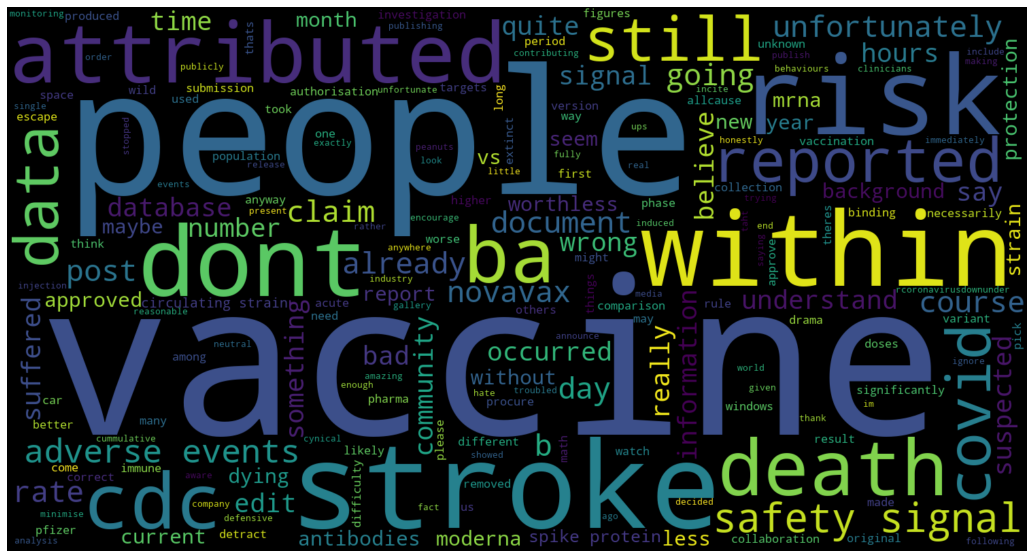

In [16]:
generateCloud(neg_word_list)